# Association Analysis

### a. Specifying the data analysis question

Analyse Customer transaction Data from a local supermarket and build a recommender system.

### b. Defining the metrics of success
* Actionable insight on the customer data.
* Build a model that predicts the next customer purchase with more than 80% confidence.





### c. Understanding the context

Association analysis (also regarded as association rules or market basket analysis) is an unsupervised method that is used to discover patterns that occur within a given dataset by identifying relationships between observations and variables from a dataset. These relationships are defined by a set of rules that indicate groups of items that tend to be associated with others. In a business context, this technique is adopted in understanding the relationships between different variables. The information obtained is then used to make recommendations for the next customer given they have some similar items in the list. This approach is especially useful in boosting sales and is popularly used in e-commerce businesses. 

### d. Recording the experimental design

*   Load and preview the data set
*   Clean the data set 
*   Explore the data set and its variables
*   Implement association analysis













In [21]:
# install the required arules library 
install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [22]:
# load the data set
path <-"http://bit.ly/SupermarketDatasetII"

customer_transactions <-read.transactions(path, sep = ",")
customer_transactions

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [23]:
# check data class
class(customer_transactions)

[1] "transactions"
attr(,"package")
[1] "arules"

In [24]:
# preview first 5 customer transactions
inspect(customer_transactions[1:5])

    items              
[1] {almonds,          
     antioxydant juice,
     avocado,          
     cottage cheese,   
     energy drink,     
     frozen smoothie,  
     green grapes,     
     green tea,        
     honey,            
     low fat yogurt,   
     mineral water,    
     olive oil,        
     salad,            
     salmon,           
     shrimp,           
     spinach,          
     tomato juice,     
     vegetables mix,   
     whole weat flour, 
     yams}             
[2] {burgers,          
     eggs,             
     meatballs}        
[3] {chutney}          
[4] {avocado,          
     turkey}           
[5] {energy bar,       
     green tea,        
     milk,             
     mineral water,    
     whole wheat rice} 


In [25]:
# explore items in the dataset
items<-as.data.frame(itemLabels(customer_transactions))
colnames(items) <- "Item"
head(items, 20)

,Item
,<fct>
1,almonds
2,antioxydant juice
3,asparagus
4,avocado
5,babies food
6,bacon
7,barbecue sauce
8,black tea
9,blueberries


In [26]:
# check summary of the data
summary(customer_transactions)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

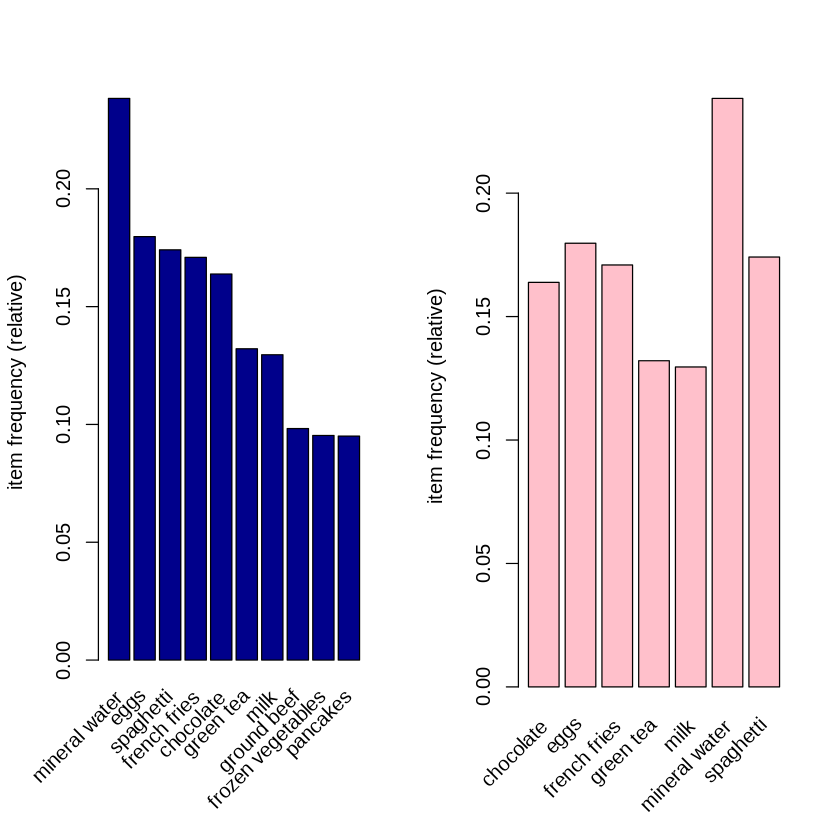

In [27]:
par(mfrow = c(1, 2))

# plot the frequency of items
itemFrequencyPlot(customer_transactions, topN = 10,col="darkblue")
itemFrequencyPlot(customer_transactions, support = 0.1,col="pink")

## Implementing the solution

In [28]:
# Building a model based on association rules 
# We use Min Support as 0.001 and confidence as 0.8

rules <- apriori (customer_transactions, parameter = list(supp = 0.001, conf = 0.8))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

In [29]:
# examine model structure
summary(rules)

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
                  data ntransactions support confidence
 customer_transactions          7501   0.001        0.8

In [30]:
# check model rules
inspect(rules[1:5])

    lhs                             rhs             support     confidence
[1] {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2] {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3] {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[4] {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5] {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
    coverage    lift      count
[1] 0.001199840  3.729058  8   
[2] 0.002133049  4.666587 13   
[3] 0.001466471  3.432428  9   
[4] 0.001866418  3.595877 12   
[5] 0.002666311 11.976387 19   


In [31]:
# order rules by confidence
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence coverage    lift      count
[1] 1.00       0.001066524 12.606723  8   
[2] 1.00       0.001199840  4.195190  9   
[3] 1.00       0.001066524  7.717078  8   
[4] 1.00       0.001199840  4.195190  9   
[5] 0.95       0.002666311 11.976387 19   


In [32]:
# order rules by support
rules<-sort(rules, by="support", decreasing=TRUE)
inspect(rules[1:5])

    lhs                       rhs                 support confidence    coverage      lift count
[1] {mushroom cream sauce,                                                                      
     pasta}                => {escalope}      0.002532996  0.9500000 0.002666311 11.976387    19
[2] {frozen vegetables,                                                                         
     olive oil,                                                                                 
     tomatoes}             => {spaghetti}     0.002133049  0.8421053 0.002532996  4.836624    16
[3] {red wine,                                                                                  
     soup}                 => {mineral water} 0.001866418  0.9333333 0.001999733  3.915511    14
[4] {frozen vegetables,                                                                         
     olive oil,                                                                                 
     shrimp}               => 

In [33]:
# Set confidence as 0.9
rules1 <- apriori (customer_transactions, parameter = list(supp = 0.001, conf = 0.9))
rules1

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [11 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 11 rules 

In [34]:
# summary rules
summary(rules1)

set of 11 rules

rule length distribution (lhs + rhs):sizes
3 4 5 
2 7 2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3       4       4       4       4       5 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.9000   Min.   :0.001067   Min.   : 3.776  
 1st Qu.:0.001200   1st Qu.:0.9091   1st Qu.:0.001200   1st Qu.: 3.865  
 Median :0.001200   Median :0.9333   Median :0.001333   Median : 4.195  
 Mean   :0.001394   Mean   :0.9464   Mean   :0.001479   Mean   : 7.086  
 3rd Qu.:0.001333   3rd Qu.:1.0000   3rd Qu.:0.001466   3rd Qu.:10.614  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count      
 Min.   : 8.00  
 1st Qu.: 9.00  
 Median : 9.00  
 Mean   :10.45  
 3rd Qu.:10.00  
 Max.   :19.00  

mining info:
                  data ntransactions support confidence
 customer_transactions          7501   0.001        0.9

In [35]:
# check model rules
inspect(rules1[1:5])

    lhs                                          rhs             support    
[1] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
[2] {red wine,soup}                           => {mineral water} 0.001866418
[3] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[4] {eggs,mineral water,pasta}                => {shrimp}        0.001333156
[5] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
    confidence coverage    lift      count
[1] 0.9500000  0.002666311 11.976387 19   
[2] 0.9333333  0.001999733  3.915511 14   
[3] 1.0000000  0.001066524 12.606723  8   
[4] 0.9090909  0.001466471 12.722185 10   
[5] 1.0000000  0.001199840  4.195190  9   


In [36]:
# sort rules by confidence interval
rules1<-sort(rules1, by="confidence", decreasing=TRUE)
inspect(rules1[1:5])

    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence coverage    lift      count
[1] 1.00       0.001066524 12.606723  8   
[2] 1.00       0.001199840  4.195190  9   
[3] 1.00       0.001066524  7.717078  8   
[4] 1.00       0.001199840  4.195190  9   
[5] 0.95       0.002666311 11.976387 19   


In [37]:
# order rules by support
rules1<-sort(rules1, by="support", decreasing=TRUE)
inspect(rules1[1:5])

    lhs                       rhs                 support confidence    coverage      lift count
[1] {mushroom cream sauce,                                                                      
     pasta}                => {escalope}      0.002532996  0.9500000 0.002666311 11.976387    19
[2] {red wine,                                                                                  
     soup}                 => {mineral water} 0.001866418  0.9333333 0.001999733  3.915511    14
[3] {eggs,                                                                                      
     mineral water,                                                                             
     pasta}                => {shrimp}        0.001333156  0.9090909 0.001466471 12.722185    10
[4] {herb & pepper,                                                                             
     mineral water,                                                                             
     rice}                 => 